In [1]:
from analyze import *
import os

# look through flight_data folder for files
# and print out the file names with numbers
files = [f for f in os.listdir("flight_data") if "okt23" in f.lower()]
for i, f in enumerate(files):
    print(i, f)

0 Okt23_Dummy_drone_IMU_only5.csv
1 Okt23_Dummy_drone_IMU_only3.csv
2 Okt23_Dummy_drone_IMU_only2.csv
3 Okt23_Dummy_drone_IMU_only.csv
4 Okt23_Dummy_drone_IMU_only4.csv


In [ ]:
def special_

In [32]:
path1 = 'flight_data/Okt23_Dummy_drone_IMU_only.csv'
data1 = load_flight_data(path1)
data1 = trim_nn_active(data1)

path2 = 'flight_data/Okt23_Dummy_drone_IMU_only2.csv'
data2 = load_flight_data(path2)
data2 = trim_nn_active(data2)

path3 = 'flight_data/Okt23_Dummy_drone_IMU_only3.csv'
data3 = load_flight_data(path3)
data3 = trim_nn_active(data3)

path4 = 'flight_data/Okt23_Dummy_drone_IMU_only4.csv'
data4 = load_flight_data(path4)
data4 = trim_nn_active(data4)

path5 = 'flight_data/Okt23_Dummy_drone_IMU_only5.csv'
data5 = load_flight_data(path5)
data5 = trim_nn_active(data5)

data = data3

Loading flight_data/Okt23_Dummy_drone_IMU_only.csv
Logging frequency: 496.14116933659784
Loading flight_data/Okt23_Dummy_drone_IMU_only2.csv
Logging frequency: 488.4122430380399
Loading flight_data/Okt23_Dummy_drone_IMU_only3.csv
Logging frequency: 496.22105017149306
Loading flight_data/Okt23_Dummy_drone_IMU_only4.csv
Logging frequency: 496.2648674052583
Loading flight_data/Okt23_Dummy_drone_IMU_only5.csv
Logging frequency: 479.5825672218647


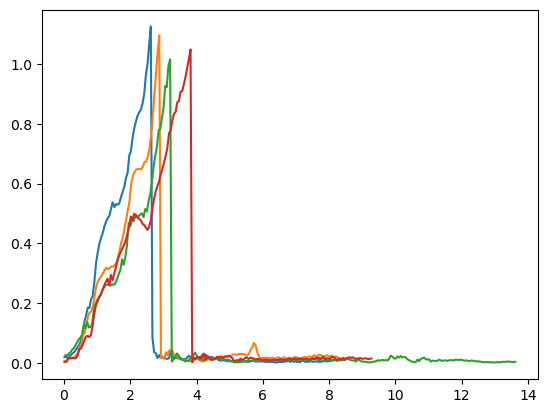

In [36]:
def plot_drift(data, **kwargs):
    # plot the distance between x,y,z and x_opti, y_opti, z_opti
    drift = np.sqrt((data['x'] - data['x_opti'])**2 + (data['y'] - data['y_opti'])**2 + (data['z'] - data['z_opti'])**2)
    # only plot the indices where x_opti updates
    updates = (np.diff(data['x_opti']) != 0) | (np.diff(data['y_opti']) != 0) | (np.diff(data['z_opti']) != 0) | (np.diff(data['phi_opti']) != 0) | (np.diff(data['theta_opti']) != 0) | (np.diff(data['psi_opti']) != 0)
    idx = np.where(updates)[0]+1
    final_i = 0
    for i in idx:
        if drift[i] >= 1.:
            final_i = i
            break
    idx = idx[:final_i]
    plt.plot(data['t'][idx], drift[idx], **kwargs)


plot_drift(data1)
plot_drift(data2)
# plot_drift(data3)
plot_drift(data4)
plot_drift(data5)


In [17]:
# # the corresponding orin log is
# path_orin = '/home/robinferede/Git/dronerace/logs/73/uart_logs/imu-1970-1-1-1-3-22.csv'

# import pandas as pd
# # ignore spaces in the csv file
# df = pd.read_csv(path_orin, skipinitialspace=True)

# orin_t  = np.array(df['imu_time'])
# orin_ax = np.array(df['imu_x'])
# orin_ay = np.array(df['imu_y'])
# orin_az = np.array(df['imu_z'])
# orin_p  = np.array(df['imu_roll'])
# orin_q  = np.array(df['imu_pitch'])
# orin_r  = np.array(df['imu_yaw'])

# # butterworth 1st order 50Hz filter
# from scipy.signal import butter, lfilter
# cutoff = 100
# sos = sp.signal.butter(1, cutoff, 'low', fs=1/np.mean(np.diff(orin_t)), output='sos')
# # apply to orin_ax, orin_ay, orin_az, orin_p, orin_q, orin_r
# orin_ax_ = sp.signal.sosfilt(sos, orin_ax)
# orin_ay_ = sp.signal.sosfilt(sos, orin_ay)
# orin_az_ = sp.signal.sosfilt(sos, orin_az)
# orin_p_  = sp.signal.sosfilt(sos, orin_p)
# orin_q_  = sp.signal.sosfilt(sos, orin_q)
# orin_r_  = sp.signal.sosfilt(sos, orin_r)

# # make a new csv file with the filtered data
# df['imu_x'] = orin_ax_
# df['imu_y'] = orin_ay_
# df['imu_z'] = orin_az_
# df['imu_roll'] = orin_p_
# df['imu_pitch'] = orin_q_
# df['imu_yaw'] = orin_r_

# # everything should be readable as floats
# df.to_csv('imu-1970-1-1-1-3-22FILTERED.csv', index=False, float_format='%.6f')

In [33]:
# reload analyze
import importlib
import analyze
importlib.reload(analyze)

# race track
r = 1.5
gate_pos = np.array([
    [ r,  -r, -1.5],
    [ 0,   0, -1.5],
    [-r,   r, -1.5],
    [ 0, 2*r, -1.5],
    [ r,   r, -1.5],
    [ 0,   0, -1.5],
    [-r,  -r, -1.5],
    [ 0,-2*r, -1.5]
])
gate_yaw = np.array([1,2,1,0,-1,-2,-1,0])*np.pi/2

# # long oval
# gate_pos = np.array([
#     [1.5, -5., -1.5],
#     [1.5,  5., -1.5],
#     [0.0, 6.5, -1.5],
#     [-1.5, 5., -1.5],
#     [-1.5, -5., -1.5],
#     [0.0, -6.5, -1.5]
# ])
# gate_yaw = np.array([0, 0, 0.5, 1, 1, 1.5])*np.pi+np.pi/2

animate_data_multiple2(data, gate_pos=gate_pos, gate_yaw=gate_yaw)

QObject::moveToThread: Current thread (0x56d0d4bf1b80) is not the object's thread (0x56d0d4d3ae60).
Cannot move to target thread (0x56d0d4bf1b80)

QObject::moveToThread: Current thread (0x56d0d4bf1b80) is not the object's thread (0x56d0d4d3ae60).
Cannot move to target thread (0x56d0d4bf1b80)

QObject::moveToThread: Current thread (0x56d0d4bf1b80) is not the object's thread (0x56d0d4d3ae60).
Cannot move to target thread (0x56d0d4bf1b80)

QObject::moveToThread: Current thread (0x56d0d4bf1b80) is not the object's thread (0x56d0d4d3ae60).
Cannot move to target thread (0x56d0d4bf1b80)

QObject::moveToThread: Current thread (0x56d0d4bf1b80) is not the object's thread (0x56d0d4d3ae60).
Cannot move to target thread (0x56d0d4bf1b80)

QObject::moveToThread: Current thread (0x56d0d4bf1b80) is not the object's thread (0x56d0d4d3ae60).
Cannot move to target thread (0x56d0d4bf1b80)

QObject::moveToThread: Current thread (0x56d0d4bf1b80) is not the object's thread (0x56d0d4d3ae60).
Cannot move to tar

In [ ]:
plt.plot(data['t'], data['az_unfiltered'])
# line at +-16g
plt.axhline(16*9.81, color='r', linestyle='--')
plt.axhline(-16*9.81, color='r', linestyle='--')

In [ ]:
imu_plot(data)

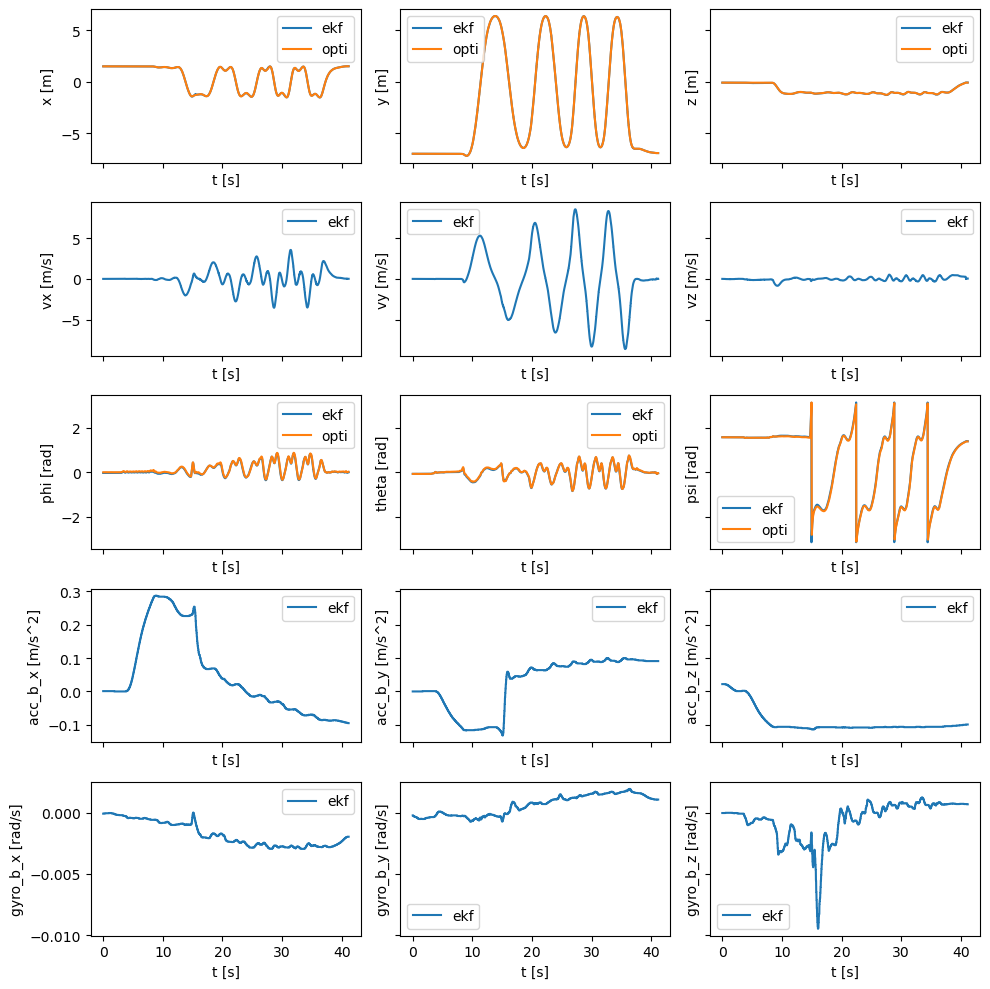

In [89]:
# NOT INLINE
ekf_plot(data)

In [ ]:
plt.plot(data['t'], data['v'])

In [ ]:
%matplotlib
plt.plot(data['t'], data['ekf_phi'], label='ekf phi')
plt.plot(data['t'], data['phi_opti'], label='opti phi')
plt.xlim([30,40])
plt.legend()
plt.show()

plt.plot(data['t'], data['ekf_theta'], label='ekf theta')
plt.plot(data['t'], data['theta_opti'], label='opti theta')
plt.xlim([30,40])
plt.legend()
plt.show()

plt.plot(data['t'], data['ekf_psi'], label='ekf psi')
plt.plot(data['t'], data['psi_opti'], label='opti psi')
plt.xlim([30,40])
plt.legend()
plt.show()

In [ ]:
quat_opti = np.array([data['qw_opti'], data['qx_opti'], data['qy_opti'], data['qz_opti']]).T
norm = np.linalg.norm(quat_opti, axis=1)
plt.plot(data['t'], norm)

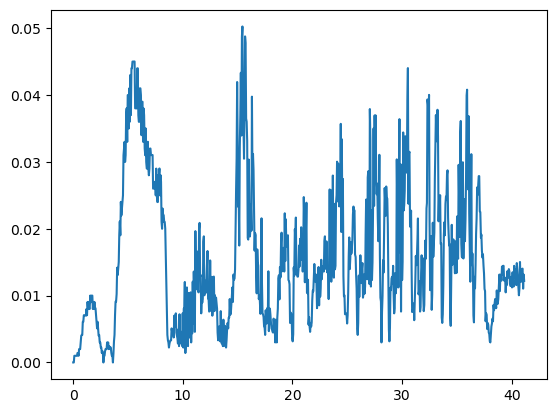

In [92]:
ekf_updates = (np.diff(data['x_opti']) != 0) | (np.diff(data['y_opti']) != 0) | (np.diff(data['z_opti']) != 0) | (np.diff(data['phi_opti']) != 0) | (np.diff(data['theta_opti']) != 0) | (np.diff(data['psi_opti']) != 0)
ekf_updates = np.where(ekf_updates)[0]+1

diff = np.sqrt((data['x_opti'] - data['ekf_x'])**2 + (data['y_opti'] - data['ekf_y'])**2 + (data['z_opti'] - data['ekf_z'])**2)
plt.plot(data['t'][ekf_updates], diff[ekf_updates])